# 12-7. 실습 : 비슷한 이미지 찾아내기

## CIFAR-100 이미지 중 비슷한 이미지 찾아내기

In [11]:
# import module

import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'cifar-images')

In [12]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

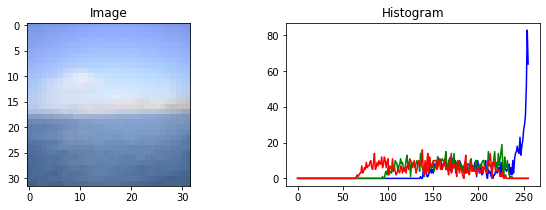

In [13]:
draw_color_histogram_from_image('adriatic_s_001807.png')

### STEP 1. 아이디어 개요

- 프로그램이 실행된다.

- 입력된 경로의 이미지 파일을 불러온다.

- 검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 표시한다.

- 프로그램이 종료된다.

### STEP 2. 아이디어 구체화

- 프로그램이 실행된다.

- 입력된 경로의 이미지 파일을 불러온다.

- 검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.


    - 검색 대상 이미지들을 불러온다.

    - 입력 이미지와 비교하여 유사도를 기준으로 순서를 매긴다.

    - 유사도 순서상으로 상위 5개 이미지를 고른다.


- 고른 이미지들을 표시한다.

- 프로그램이 종료된다.

### STEP 3. 핵심 알고리즘 - 유사도 계산 방법

- 프로그램이 실행된다.
- 입력된 경로의 이미지 파일을 불러온다.
- 검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.


    - 검색 대상 이미지들을 불러온다.

    - 입력 이미지와 비교하여 유사도를 기준으로 순서를 매긴다.

        - 입력 이미지와 검색 대상 이미지들 사이의 유사도를 계산한다.
        - 계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
    - 유사도 순서상으로 상위 5개 이미지를 고른다.

-고른 이미지들을 표시한다.
- 프로그램이 종료된다.

-------------------------------------------------------------------


그리고 우리는 유사도를 히스토그램끼리 비교할 것이고, 여기에는 OpenCV의 기능을 사용할 예정이라고 했습니다.

- 프로그램이 실행된다.

- 입력된 경로의 이미지 파일을 불러온다.

- 검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.

    - 검색 대상 이미지들을 불러온다.
    - 입력 이미지와 비교하여 유사도를 기준으로 순서를 매긴다.

        - 입력 이미지와 검색 대상 이미지들 사이의 유사도를 계산한다.

            - 입력 이미지와 검색 대상 이미지들을 하나하나 히스토그램으로 만든다.
            - OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.

        - 계산된 유사도를 기준으로 정렬하여 순서를 매긴다.

    - 유사도 순서상으로 상위 5개 이미지를 고른다.
    
- 고른 이미지들을 표시한다.

- 프로그램이 종료된다.

### STEP 4. 기능의 모듈화

프로그램이 실행된다.

입력된 경로의 이미지 파일을 불러온다.

검색 대상 이미지들을 불러온다.

입력 이미지를 히스토그램으로 만든다.

검색 대상 이미지들을 하나하나 히스토그램으로 만든다.

OpenCV의 compareHist() 함수를 사용하여 입력 이미지와
검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.

계산된 유사도를 기준으로 정렬하여 순서를 매긴다.

유사도 순서상으로 상위 5개 이미지를 고른다.

고른 이미지들을 표시한다.

프로그램이 종료된다.

----------------------------------------------------------------

우리의 설계가 좀 더 코드스러워지도록, 유관한 단계들을 묶어 함수들로 만들어봅시다.


프로그램이 실행된다.

입력된 경로의 이미지 파일을 불러온다.

입력 이미지를 히스토그램으로 만든다.

build_histogram_db()

    검색 대상 이미지들을 불러온다.
    검색 대상 이미지들을 하나하나 히스토그램으로 만든다.

search()

    OpenCV의 compareHist() 함수를 사용하여 입력 이미지와
    검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.

    계산된 유사도를 기준으로 정렬하여 순서를 매긴다.

    유사도 순서상으로 상위 5개 이미지를 고른다.

고른 이미지들을 표시한다.

프로그램이 종료된다.

--------------------------------------------------------------------------------
자, 여기서 조금 더 원활한 실습을 위해, 우리의 설계가 조금 더 단순해지도록 기능을 살짝 제한해 보겠습니다. 아무 이미지나 입력받는 게 아니라, 검색 대상이었던 CIFAR-100 이미지 중 하나의 이름을 입력받는 것으로 대체해 봅시다.

프로그램이 실행된다.

build_histogram_db()

    CIFAR-100 이미지들을 불러온다.
    CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.

CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는 히스토그램을 입력 이미지로 선택한다.

search()

    OpenCV의 compareHist() 함수를 사용하여 입력 이미지와
    검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.
    
    계산된 유사도를 기준으로 정렬하여 순서를 매긴다.

    유사도 순서상으로 상위 5개 이미지를 고른다.

고른 이미지들을 표시한다.

프로그램이 종료된다.


### STEP 5. 설계 과정 완성

그럼 마지막 단계로, 각 함수에 입력되고 반환될 데이터의 형태와 변수명을 한번 정해봅시다.

프로그램이 실행된다.

build_histogram_db()

    CIFAR-100 이미지들을 불러온다.

    CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.
    
    이미지 이름을 키로 하고, 히스토그램을 값으로 하는
    
    딕셔너리 histogram_db를 반환한다.

CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는
히스토그램을 입력 이미지로 선택하여 target_histogram이라는 변수명으로 지정한다.

search()

    입력 이미지 히스토그램 target_histogram와 전체 검색
    대상 이미지들의 히스토그램을 가진 딕셔너리 histogram_db를 입력으로 받는다.

    OpenCV의 compareHist() 함수를 사용하여 입력 이미지와
    검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.
    결과는 result라는 이름의 딕셔너리로, 키는 이미지 이름, 값은 유사도로 한다.

    계산된 유사도를 기준으로 정렬하여 순서를 매긴다.

    유사도 순서상으로 상위 5개 이미지만 골라서 result에 남긴다.

고른 이미지들을 표시한다.

프로그램이 종료된다.

### STEP 6. 코드로 구현

In [16]:
# 초기 모듈 import

import os
import pickle
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))

#print(train)   # 혹시 내용이 궁금하다면 주석을 풀고 실행해 보세요.

<class 'dict'>


In [17]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)  

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

In [18]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

In [19]:
# build_histogram_db() 정의

def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)

        histogram = get_histogram(image)

        histogram_db[file_name] = histogram

    return histogram_db

In [20]:
# build_histogram_db()을 실행, 검증

histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|██████████| 49999/49999 [00:06<00:00, 7275.97it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [21]:
# target_histogram에 입력받은 이미지의 히스토그램을 저장하는 함수 만들기

def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [22]:
target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: adriatic_s_001807.png


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [24]:
# search 함수를 만들기

def search(histogram_db, target_histogram, top_k=5):
    results = {}

    # Calculate similarity distance by comparing histograms.
    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                   H2=histogram,
                                   method=cv2.HISTCMP_CHISQR)

        results[file_name] = distance

    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])

    return results

In [25]:
result = search(histogram_db, target_histogram)
result

100%|██████████| 49999/49999 [00:00<00:00, 409733.45it/s]


{'adriatic_s_001807.png': 0.0,
 'baby_s_001654.png': 0.047506706444185816,
 'fogbank_s_000423.png': 0.059270738493642845,
 'tank_s_000442.png': 0.060966690827361725,
 'dessert_plate_s_000124.png': 0.06113711905561663}

In [27]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):    
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1,len(result),idx+1)
        img = Image.open(img_path)
        im.imshow(img)

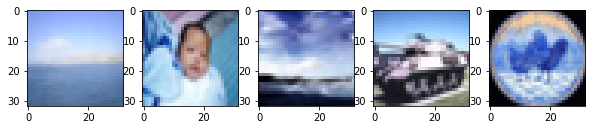

In [28]:
show_result(result)

이미지 파일명을 입력하세요: fogbank_s_000423.png


100%|██████████| 49999/49999 [00:00<00:00, 411698.55it/s]


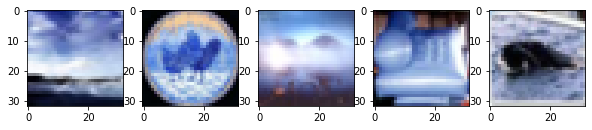

In [31]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)